<a href="https://colab.research.google.com/github/yakuparas28/YuksekLisans/blob/main/Say%C4%B1sal_G%C3%B6r%C3%BCnt%C3%BC_%C4%B0%C5%9Fleme_Dersi_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #1-Veri Yükleme
 #1.1 Kütüphanelerin İçeri Aktarılması
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
%matplotlib inline
import os
import seaborn as sns
sns.set()
import seaborn as sns
from skimage.filters import median
from skimage.filters import gaussian
import cv2
from skimage.morphology import disk

In [ ]:
 #1.2 Veri Setinin Yüklenmesi ( Github dataset  ve görsellerin olduğu proje kopyalıyoruz git clone ile)
!git clone https://github.com/hardik0/AI-for-Medicine-Specialization
%cd AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis

Cloning into 'AI-for-Medicine-Specialization'...
remote: Enumerating objects: 1601, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 1601 (delta 9), reused 2 (delta 0), pack-reused 1573 (from 1)
Receiving objects: 100% (1601/1601), 720.36 MiB | 23.00 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (1497/1497), done.
/content/AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis/AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis


In [ ]:
%ls nih/

densenet.hdf5  images_small/  pretrained_model.h5  test.csv  train-small.csv  valid-small.csv


In [ ]:
# nih klasoru altındakş train-small.csv dosyasını okuyoruz
train_df = pd.read_csv("nih/train-small.csv")
# Toplam satır ve sütun sayısını yazdıralım
print("Toplam satır ve sütun sayısı:", train_df.shape)


Toplam satır ve sütun sayısı: (1000, 16)


In [ ]:
# data frame içinde Image sutunu seçiyoruz
images = train_df['Image'].values
# Random 9 satır seçiyoruz frame içinden
random_images = [np.random.choice(images) for i in range(9)]
# GÖrsellerin Yolu
img_dir = 'nih/images_small/'
# Seçilen GÖrselleri Yazdıralım
print('Display Random Images')
print(random_images)

Display Random Images
['00020738_001.png', '00030306_000.png', '00000359_010.png', '00013209_013.png', '00030082_000.png', '00003675_000.png', '00010012_006.png', '00010827_000.png', '00024009_000.png']


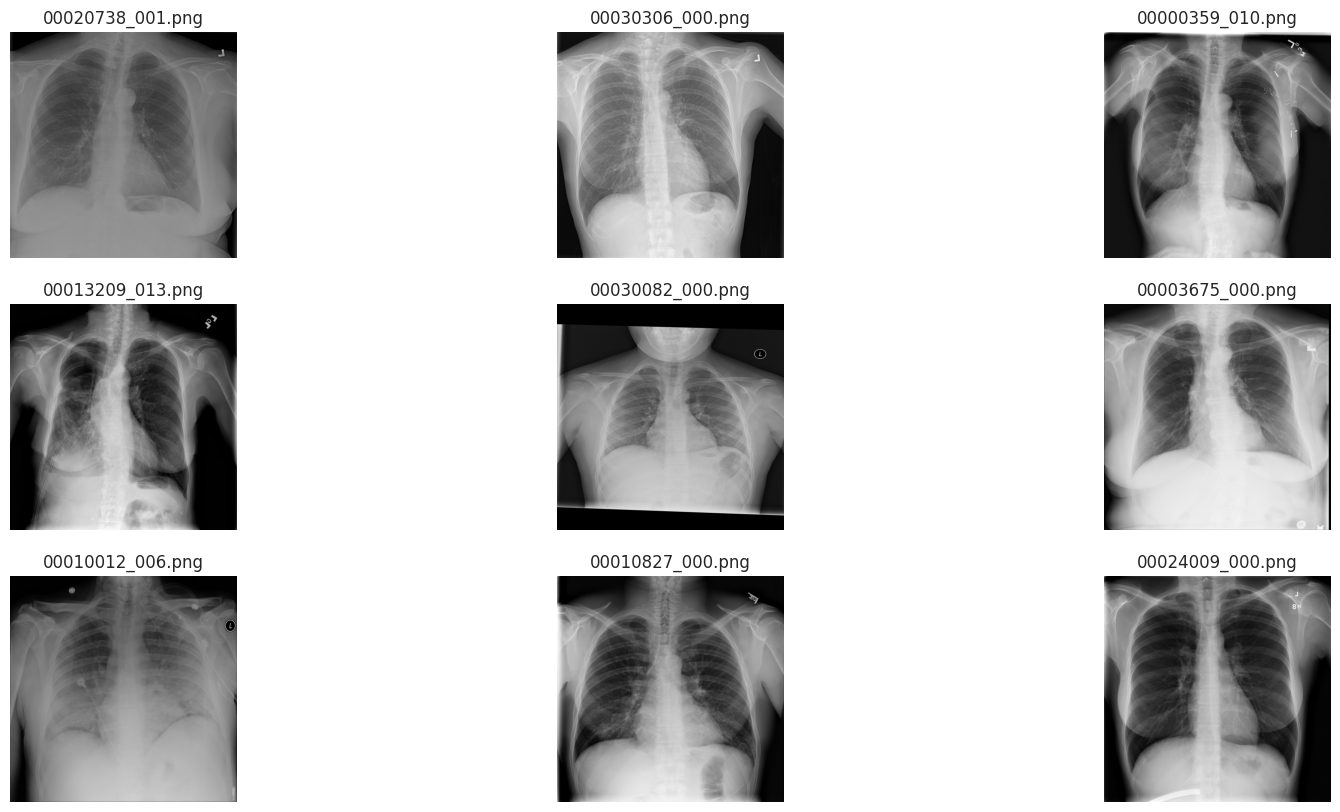

In [ ]:
# prompt: # Rastgele seçilen 9 görüntüyü görselleştirme

# Rastgele seçilen 9 görüntüyü görselleştirme
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Seçilen resimleri gösterme
plt.figure(figsize=(20,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    img = mpimg.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.title(random_images[i])
    plt.axis('off')
plt.show()

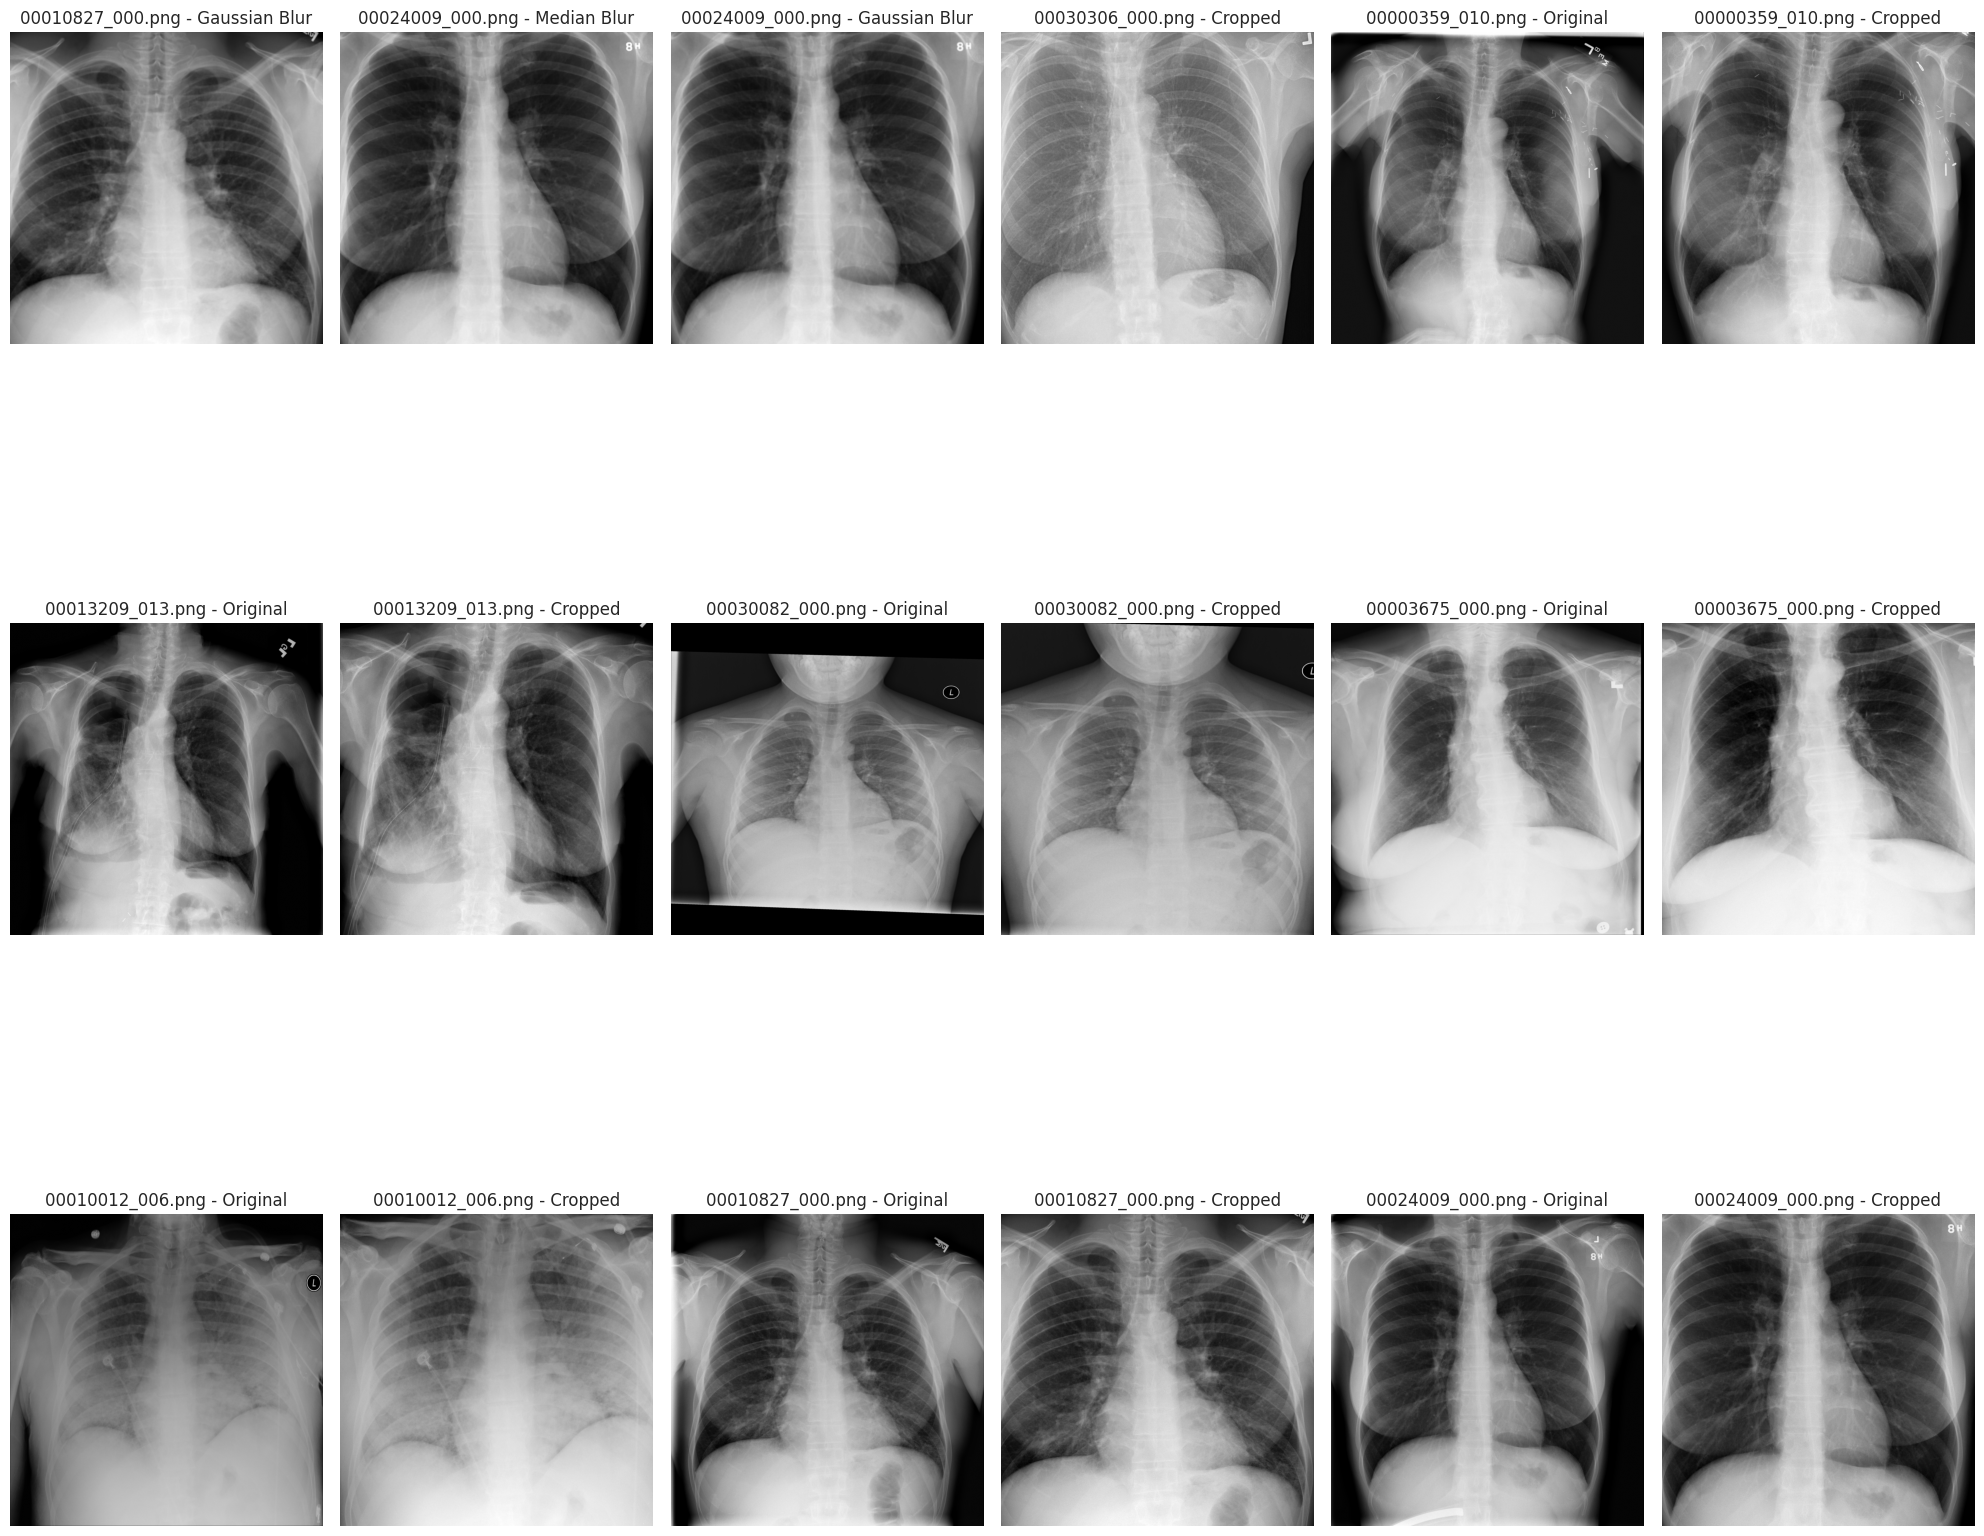

In [ ]:
# prompt: 3. Görüntü İşleme ve İyileştirme (Pre-processing)
# Görüntüleri Akciğer bölgeleri kaybolmayacak şekilde kenarlardan kırpın (Crop),(ilgi alanı dışındaki gürültü bölgelerinden kurtulun
# o Orijinal ve Crop edilmiş görüntüleri görseleştir
# elde edilen çıktıya Median ve Gaussian Blur).
# o Görüntüleri görseleştirin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
import os
import seaborn as sns
from skimage.filters import median
from skimage.filters import gaussian
import cv2
from skimage.morphology import disk
# Görüntü İşleme ve İyileştirme
plt.figure(figsize=(20,20))
for i in range(9):
    # Adjusted subplot indices to fit within a 3x6 grid
    plt.subplot(3,6,2*i+1)
    img_path = os.path.join(img_dir, random_images[i])
    img = mpimg.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title(f"{random_images[i]} - Original")
    plt.axis('off')
    # Crop işlemi (örnek bir kırpma, daha gelişmiş teknikler kullanılabilir)
    h, w = img.shape[:2]
    cropped_img = img[int(h*0.1):int(h*0.9), int(w*0.1):int(w*0.9)]  # Örnek kırpma: %10 kenarlardan kırp
    plt.subplot(3,6,2*i+2)
    plt.imshow(cropped_img, cmap='gray')
    plt.title(f"{random_images[i]} - Cropped")
    plt.axis('off')
    # Median Blur
    median_blurred = median(cropped_img, disk(2)) #disk radius belirlenmeli
    plt.subplot(3,6,(2*i+3) % 18 + 1) # Use modulo to wrap around to the beginning
    plt.imshow(median_blurred, cmap='gray')
    plt.title(f"{random_images[i]} - Median Blur")
    plt.axis('off')
    # Gaussian Blur
    gaussian_blurred = gaussian(cropped_img, sigma=1) #sigma değeri belirlenmeli
    plt.subplot(3,6,(2*i+4) % 18 + 1)  # Use modulo to wrap around to the beginning
    plt.imshow(gaussian_blurred, cmap='gray')
    plt.title(f"{random_images[i]} - Gaussian Blur")
    plt.axis('off')

plt.tight_layout()
plt.show()

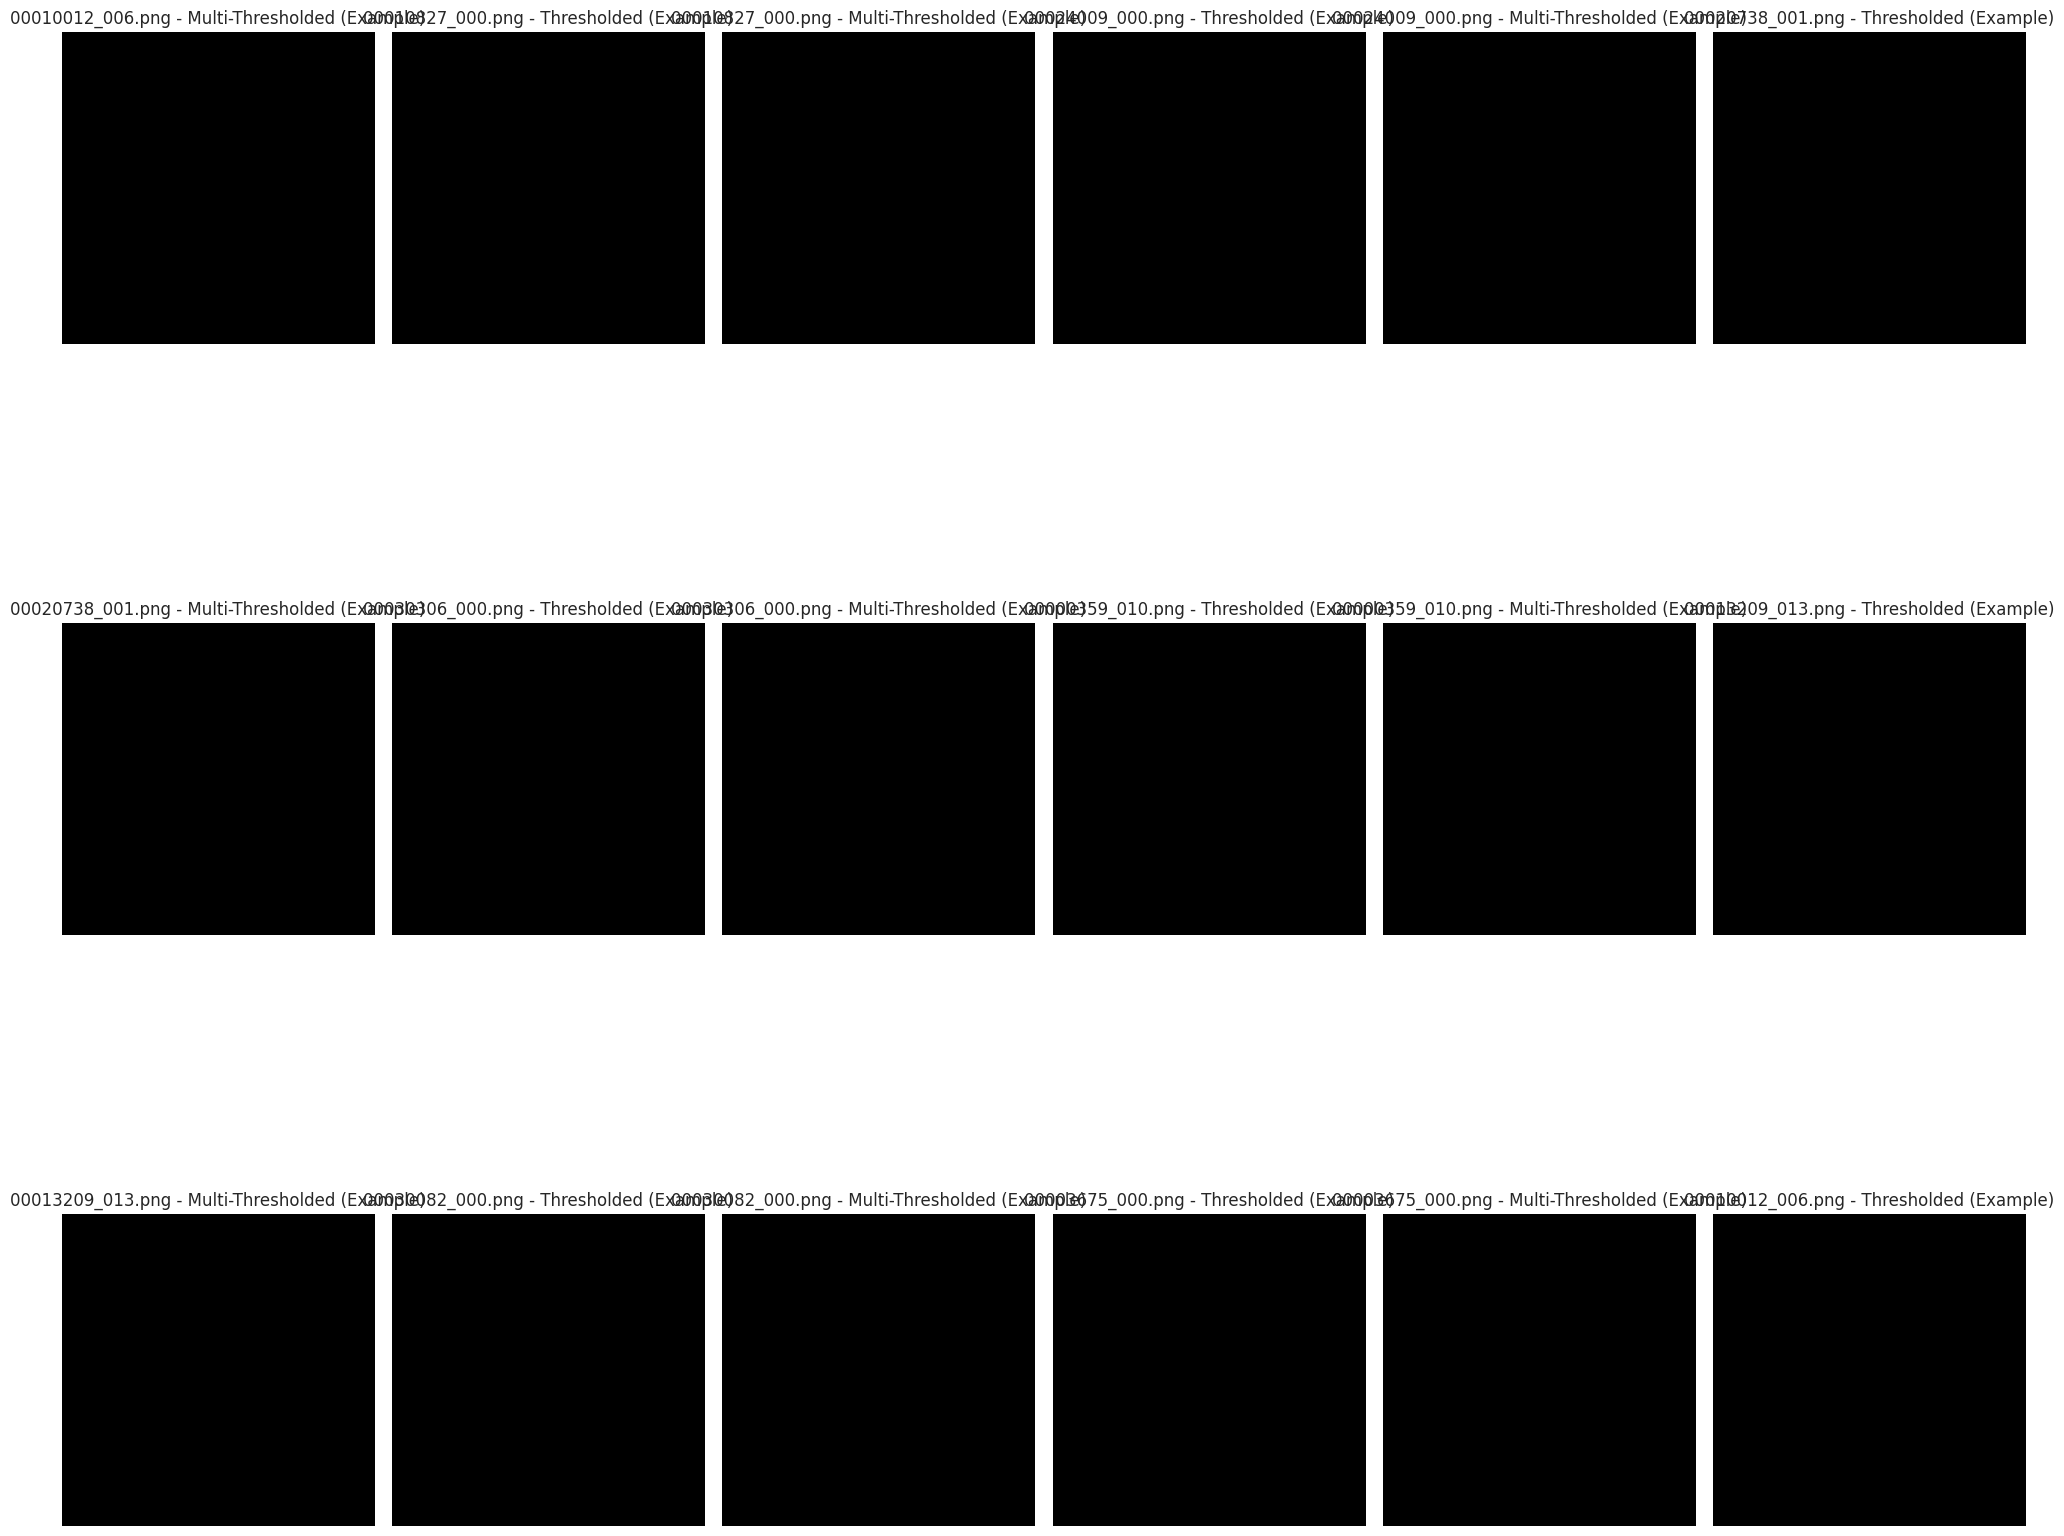

In [ ]:
# Eşik Belirleme ve Bölgeleme

plt.figure(figsize=(20,20))

for i in range(9):


    # Gaussian Blur (Örnek sigma değeri, optimize edilmelidir)
    gaussian_blurred = gaussian(cropped_img, sigma=1)

    # Eşik Belirleme (Örnek eşik değeri, Otsu yöntemi veya benzeri yöntemlerle belirlenmelidir)
    threshold_value = 100 # Örnek eşik değeri. Otsu yöntemi veya histogram analizi ile belirleyin.
    _, thresholded_image = cv2.threshold(gaussian_blurred, threshold_value, 255, cv2.THRESH_BINARY)

    plt.subplot(3,6,(2*i+5) % 18 + 1)
    plt.imshow(thresholded_image, cmap='gray')
    plt.title(f"{random_images[i]} - Thresholded (Example)")
    plt.axis('off')


    # Çoklu Eşik (Örnek, 2 eşik değeri kullanarak 3 bölge oluşturuyoruz)
    lower_threshold = 50  # Örnek alt eşik
    upper_threshold = 150 # Örnek üst eşik
    multi_thresholded = np.zeros_like(gaussian_blurred)

    multi_thresholded[(gaussian_blurred >= lower_threshold) & (gaussian_blurred < upper_threshold)] = 1  # Orta Bölge
    multi_thresholded[gaussian_blurred >= upper_threshold] = 2 # Üst Bölge

    plt.subplot(3,6,(2*i+6) % 18 + 1)
    plt.imshow(multi_thresholded, cmap='gray')
    plt.title(f"{random_images[i]} - Multi-Thresholded (Example)")
    plt.axis('off')

plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

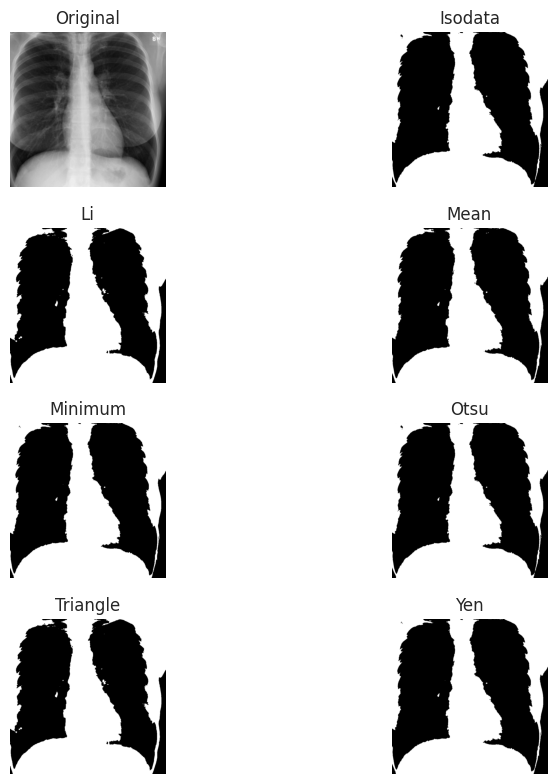

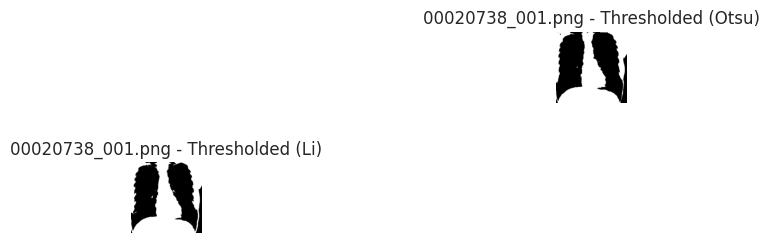

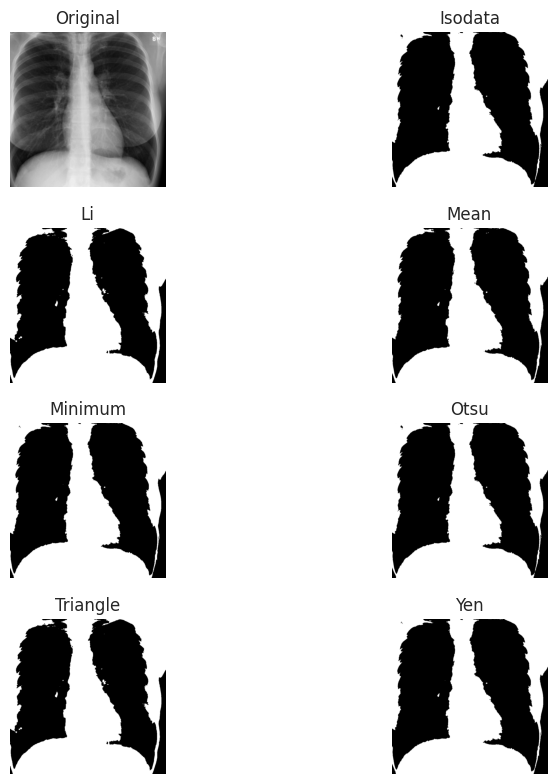

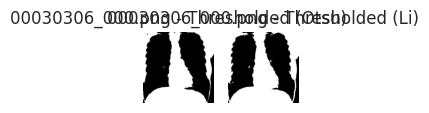

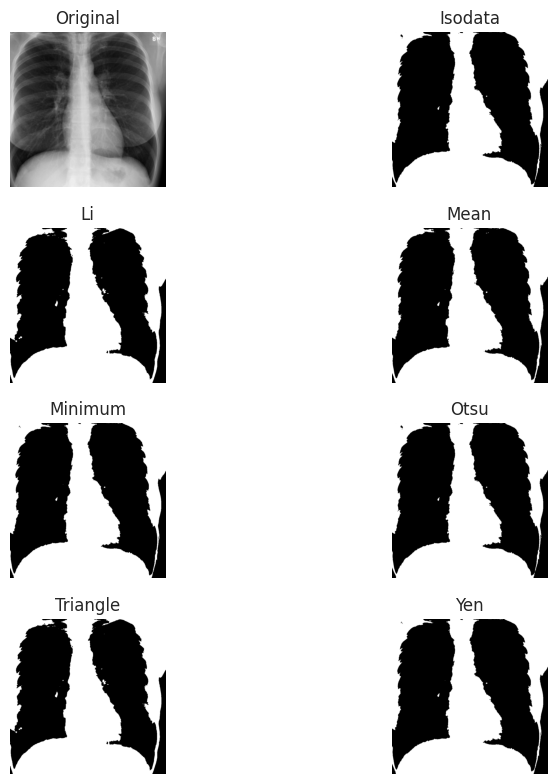

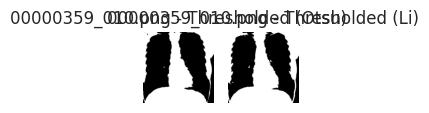

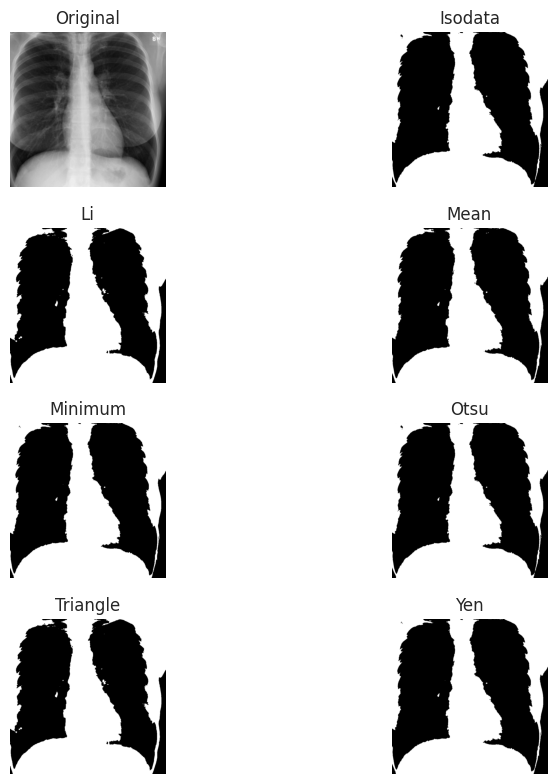

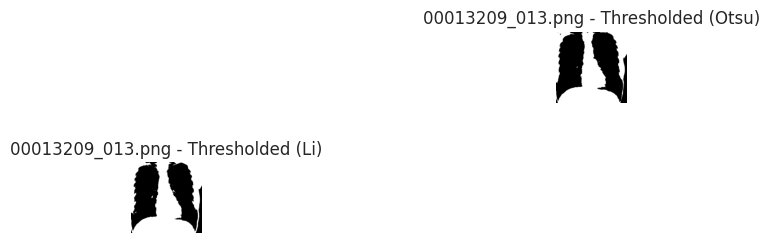

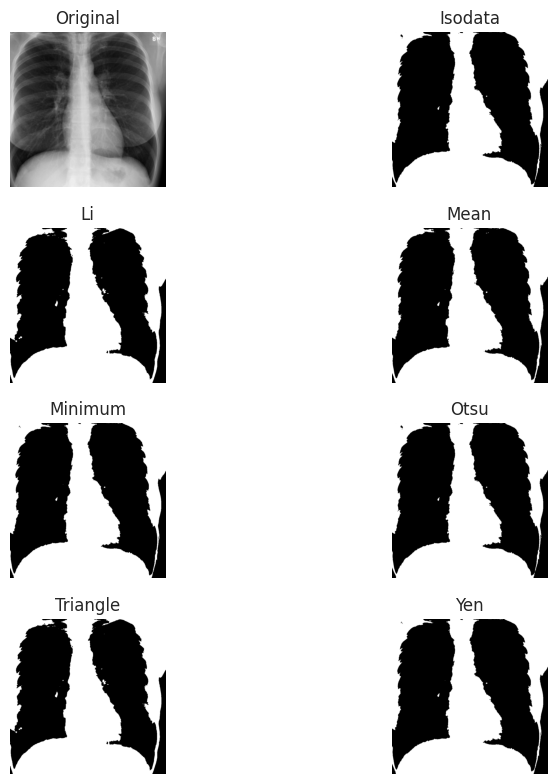

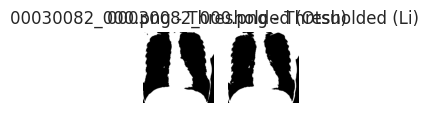

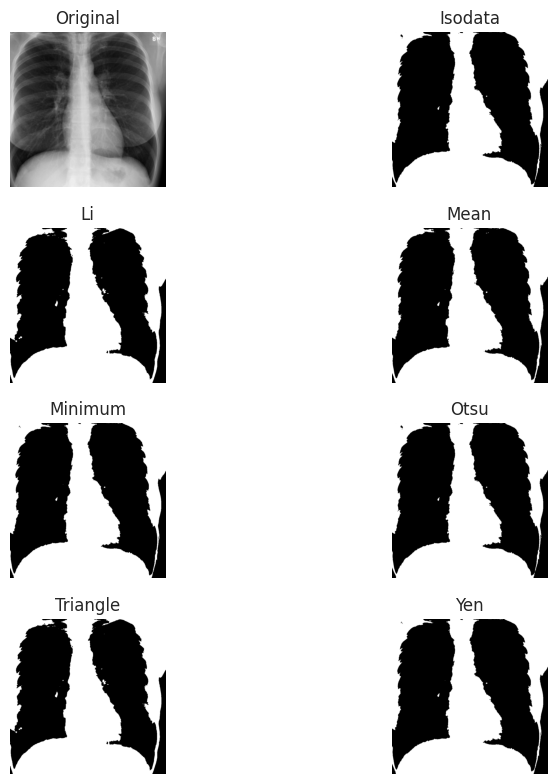

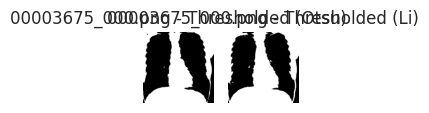

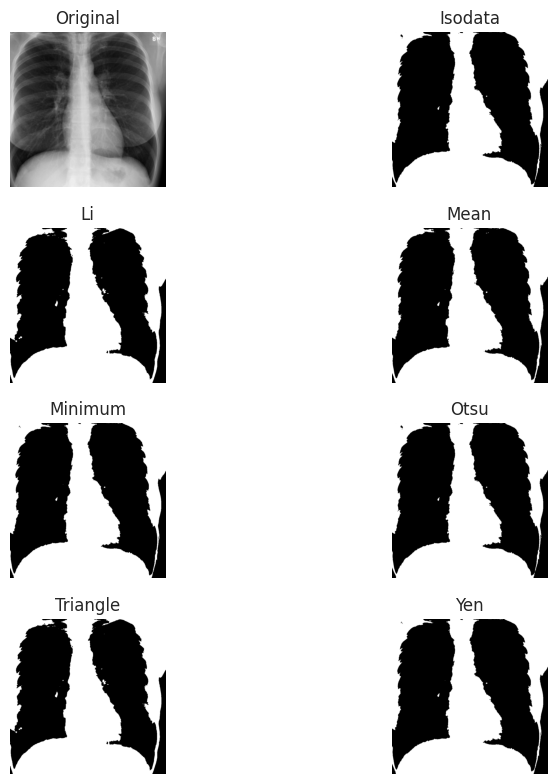

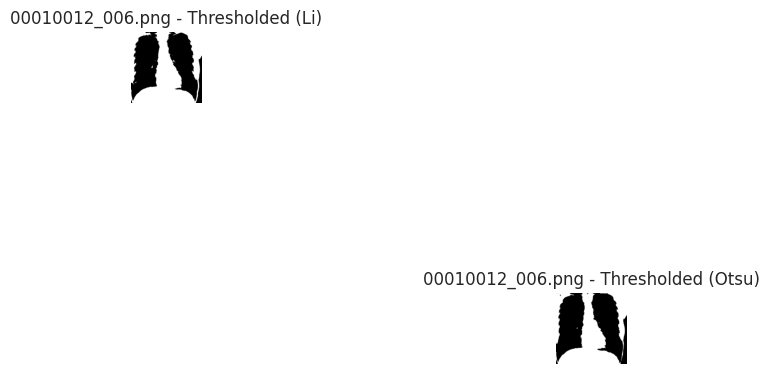

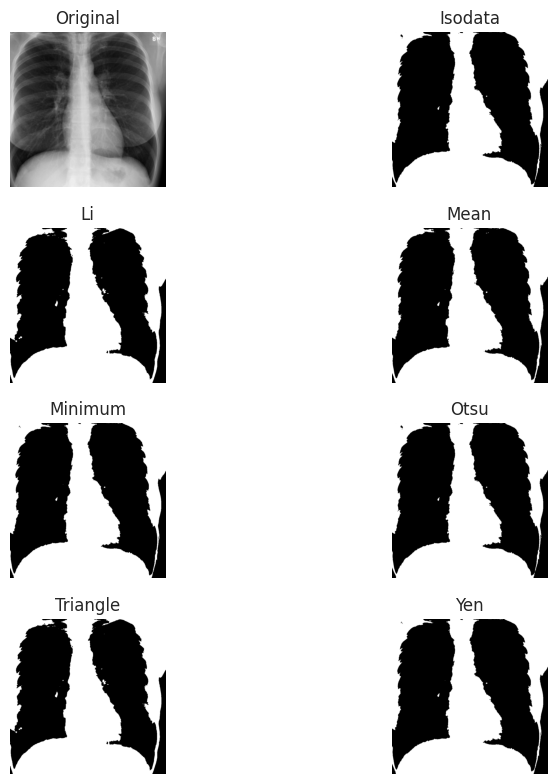

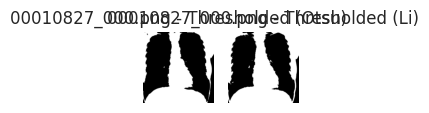

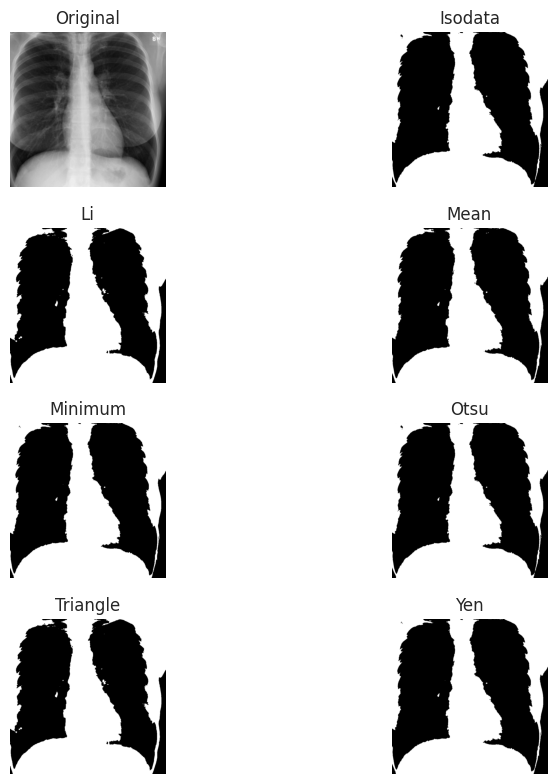

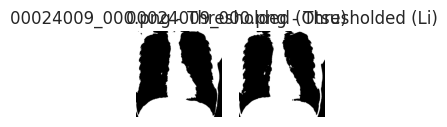

In [ ]:
# 4. Thresholding
# 2. Eşik değerlerini görüntülere uygulayarak binary görüntüleri görselleştirip uygun thresholding yöntemini i seçiniz.

from skimage.filters import try_all_threshold
plt.figure(figsize=(20,20))

for i in range(9):

    # Gaussian Blur (Örnek sigma değeri, optimize edilmelidir)
    gaussian_blurred = gaussian(cropped_img, sigma=1)
    fig, ax = try_all_threshold(gaussian_blurred, figsize=(10, 8), verbose=False)
    plt.show()
    from skimage.filters import threshold_otsu

    thresh_otsu = threshold_otsu(gaussian_blurred)
    binary_otsu = gaussian_blurred > thresh_otsu

    # Another method, for example, Li's Minimum Cross Entropy
    from skimage.filters import threshold_li

    thresh_li = threshold_li(gaussian_blurred)
    binary_li = gaussian_blurred > thresh_li


    plt.subplot(3,6,(2*i+5) % 18 + 1)
    plt.imshow(binary_otsu, cmap='gray')
    plt.title(f"{random_images[i]} - Thresholded (Otsu)")
    plt.axis('off')

    plt.subplot(3,6,(2*i+6) % 18 + 1)
    plt.imshow(binary_li, cmap='gray')
    plt.title(f"{random_images[i]} - Thresholded (Li)")
    plt.axis('off')


plt.tight_layout()
plt.show()

Image 00020738_001.png: Number of connected components: 7
Label 1: Centroid=(560.176038518147, 386.5490553860869), Area=215379.0, Eccentricity=0.7843278189992574, Perimeter=3697.2287142747455, Solidity=0.5561095389572833, Euler number=-1, Extent = 0.35204554481662914
Label 2: Centroid=(1.9195402298850575, 548.6781609195402), Area=348.0, Eccentricity=0.9978396632573016, Perimeter=155.31370849898477, Solidity=0.8529411764705882, Euler number=1, Extent = 0.7837837837837838
Label 3: Centroid=(210.8669851976766, 750.5895072137905), Area=53370.0, Eccentricity=0.9708199210254093, Perimeter=1803.7199128346442, Solidity=0.649855100698926, Euler number=1, Extent = 0.3573102312440582
Label 4: Centroid=(342.0, 496.0), Area=25.0, Eccentricity=0.0, Perimeter=16.0, Solidity=1.0, Euler number=1, Extent = 1.0
Label 5: Centroid=(405.8863636363636, 243.35227272727272), Area=88.0, Eccentricity=0.8382023504030877, Perimeter=34.48528137423857, Solidity=0.9777777777777777, Euler number=1, Extent = 0.84615384

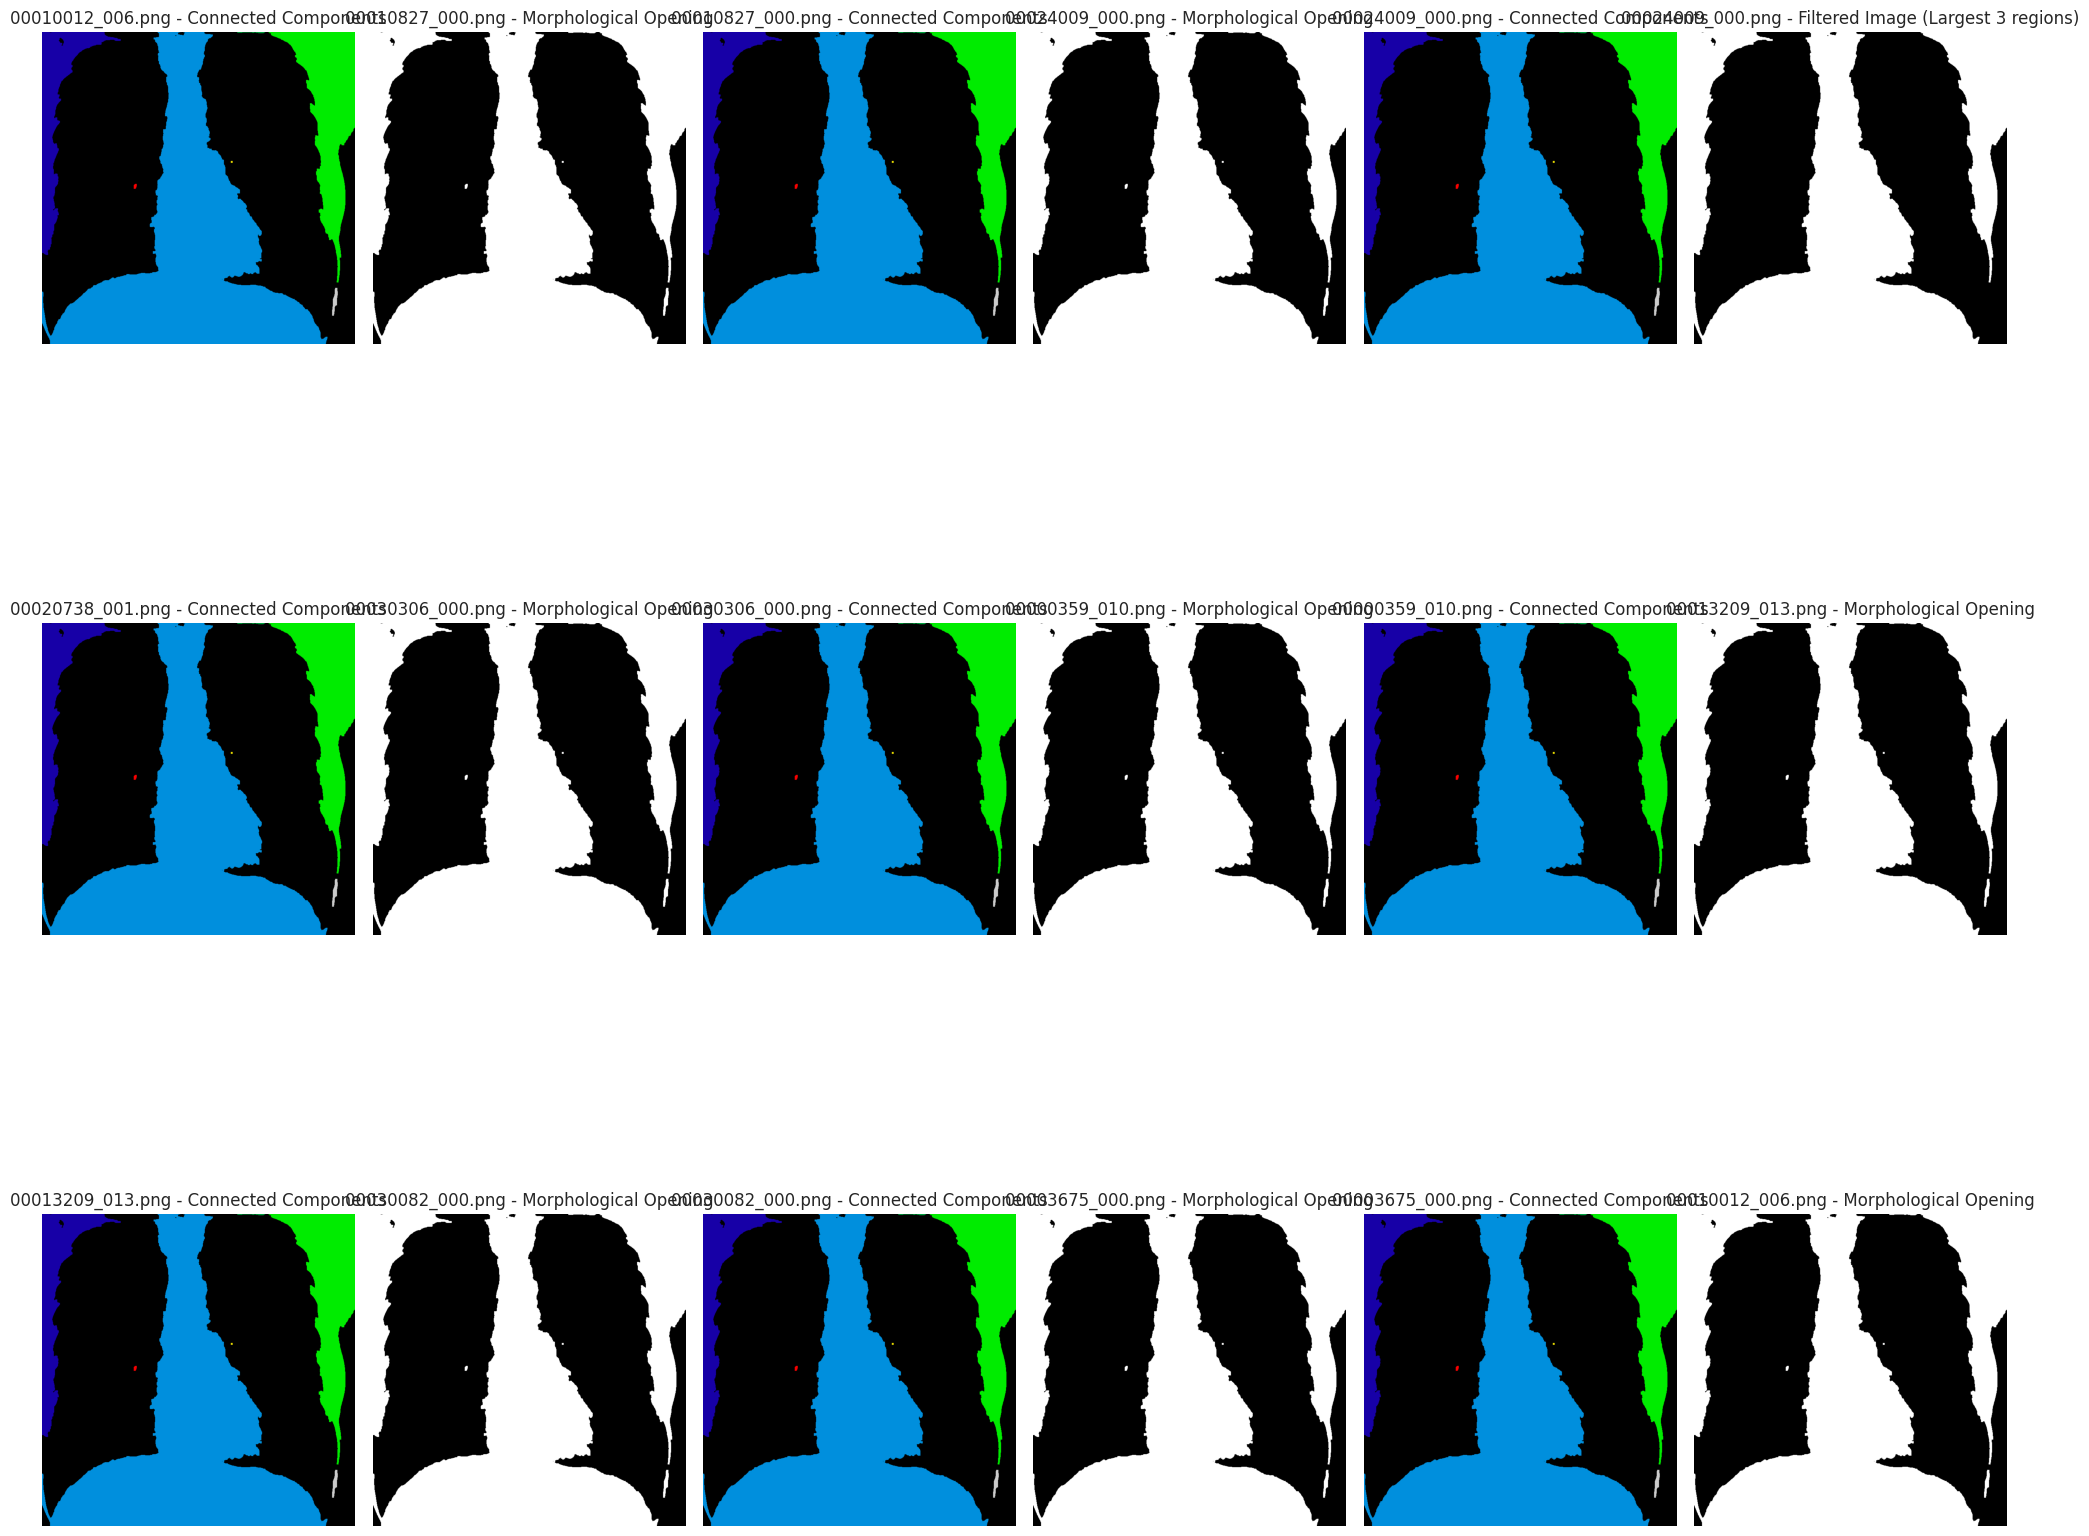

In [ ]:
# 3. Post-processing
# 1. Uygun morfolojik operatörleri, uygun structural element yapısı ve boyutunu seçerek görüntüye uygulayınız. (YORUM)
# o Giriş ve Çıkış Görüntülerini görseleştirin
# 2. Görüntüye bağlantı bileşen analizi (connected component labeling-CCL) (cv2.connectedComponents) uygulayarak olası bölge sayısını print CCL çıktısını plot edin.
# 3. Elde ettiğiniz labellar için, Centroid ve Area bilgilerinin kesinlikle olacağı, ayrıca bölgelerin yoğunluk ve şekilsel özelliklerini belirten en az 5 tane özniteliği print edin.
# o (cv2.connectedComponentsWithStats önerebilirim ama scikit-image’ın regionprops u daha iyi)
# Elde ettiğiniz stats ve labelsları inceleyerek akciğer alanlarını en iyi ifade eden öznitelikleri yorumlayınız.
# o Belirlediğniz özniteliklere göre filtreleme yapın. (örn: maks alana sahip ilk iki bölge, if maks alana sahip iki bölge and bölgelerin centroidleri ortada; filter; else try 3. Bölge; return)
# o Belirleyici öznitelik bulunamadıysa. Her görüntüde otomatik olarak label belirleyen algoritmayı yazın
# 5. Seçtiğiniz labela sahip filtrelenmiş görüntülere uygun morfolojik işlemleri (structural elemant tipi ve boyutu belirleyerek) uygulayın. Giriş ve çıkış görüntülerini görselleştirin.
# 6. Sonuçlar
# 1. İşlemler sonucunda elde ettiğiniz maske ile orijinal görüntüyü çarparak görüntü işleme sonuçlarını görselleştirip yorumlayın.
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
for i in range(9):
    kernel = np.ones((5, 5), np.uint8)  # Example kernel
    opening = cv2.morphologyEx(binary_otsu.astype(np.uint8), cv2.MORPH_OPEN, kernel)
    plt.subplot(3,6,(2*i+5) % 18 + 1)
    plt.imshow(opening, cmap='gray')
    plt.title(f"{random_images[i]} - Morphological Opening")
    plt.axis('off')
    labels = label(opening)
    num_features = np.max(labels)
    print(f"Image {random_images[i]}: Number of connected components: {num_features}")
    plt.subplot(3,6,(2*i+6) % 18 + 1)
    plt.imshow(labels, cmap='nipy_spectral')
    plt.title(f"{random_images[i]} - Connected Components")
    plt.axis('off')
    regions = regionprops(labels)
    for j, region in enumerate(regions):
        if j > 0 : #skip background
          print(f"Label {j}: Centroid={region.centroid}, Area={region.area}, "
                f"Eccentricity={region.eccentricity}, Perimeter={region.perimeter}, "
                f"Solidity={region.solidity}, Euler number={region.euler_number}, "
                f"Extent = {region.extent}")
    regions.sort(key=lambda x: x.area, reverse=True)
    if len(regions) >= 2:
        filtered_image = np.where(np.isin(labels, [regions[0].label, regions[1].label]), 255, 0).astype(np.uint8)
        centroid1 = regions[0].centroid
        centroid2 = regions[1].centroid
        middle_x = gaussian_blurred.shape[1]/2
        middle_y = gaussian_blurred.shape[0]/2
        if abs(centroid1[0]- middle_x) < gaussian_blurred.shape[1]/5 and abs(centroid1[1] - middle_y) < gaussian_blurred.shape[0]/5 and abs(centroid2[0]- middle_x) < gaussian_blurred.shape[1]/5 and abs(centroid2[1] - middle_y) < gaussian_blurred.shape[0]/5:
          print(f"{random_images[i]} : Centroids are in the middle, filtering with largest areas.")
          plt.subplot(3,6,(2*i+7) % 18 + 1)
          plt.imshow(filtered_image, cmap='gray')
          plt.title(f"{random_images[i]} - Filtered Image (Largest 2 regions)")
          plt.axis('off')
        else: #otherwise try the 3rd largest
           if len(regions) >= 3:
              filtered_image = np.where(np.isin(labels, [regions[0].label, regions[1].label, regions[2].label]), 255, 0).astype(np.uint8)
              print(f"{random_images[i]} : Centroids are not in the middle, filtering with largest 3 areas.")
              plt.subplot(3,6,(2*i+7) % 18 + 1)
              plt.imshow(filtered_image, cmap='gray')
              plt.title(f"{random_images[i]} - Filtered Image (Largest 3 regions)")
              plt.axis('off')
    else: #If no two regions with largest areas are found
        print(f"{random_images[i]} : No two regions with largest areas are found.")
plt.tight_layout()
plt.show()